## Implementation of K means with income.csv dataset

In [1]:
# Importing the required librarys
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
data.describe(percentiles=[0.25,0.50,0.75,0.90,0.95])

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
90%,41.000000,155900.000000
95%,41.950000,159800.000000
max,43.000000,162000.000000


### Applying K-mean without scaling the data

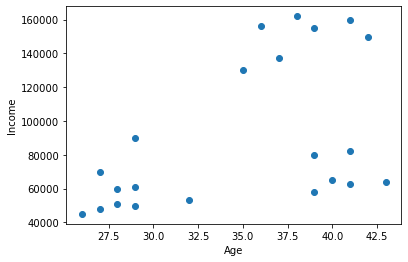

In [4]:
# Plot the data Age Vs Income to get a rough idea about clusters
plt.scatter(data.Age, data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [5]:
# Applying the K-means clustering with 3 clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [6]:
# Store the predicted cluster against the data set
data['cluster'] = y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
# To see the Euclidian centres
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

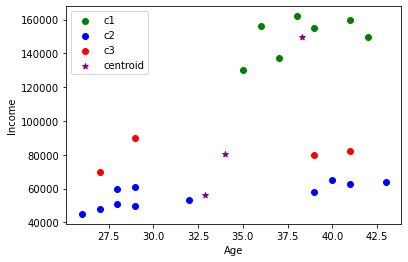

In [8]:
# Dividing the data into cluster's and plotting Age Vs Income graph again with different colors
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]

plt.scatter(c1.Age, c1['Income($)'], color='green', label='c1')
plt.scatter(c2.Age, c2['Income($)'], color='blue', label='c2')
plt.scatter(c3.Age, c3['Income($)'], color='red', label='c3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### Pre-processing using MinMax Scaler

In [9]:
scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [10]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


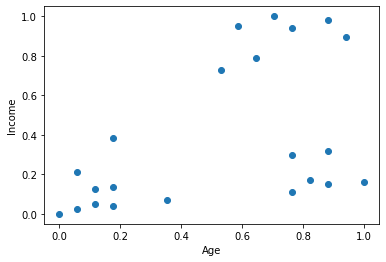

In [11]:
# Ploting the graph after scaling
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [12]:
# Applying K-means Clusting with 3 clusters.
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [13]:
# Clustering outpu after scaling.
data['cluster_with_scaling'] = y_predicted
data.head()

,Name,Age,Income($),cluster,cluster_with_scaling
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,0


In [14]:
# Centroids obtained for the three clusters
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

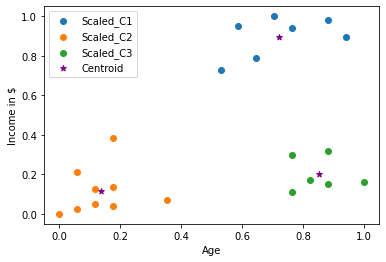

In [15]:
# Dividing the clusters into 3 and plotting in the graph
scaled_c1 = data[data.cluster_with_scaling == 0]
scaled_c2 = data[data.cluster_with_scaling == 1]
scaled_c3 = data[data.cluster_with_scaling == 2]

plt.scatter(scaled_c1.Age,scaled_c1['Income($)'], label='Scaled_C1')
plt.scatter(scaled_c2.Age,scaled_c2['Income($)'], label='Scaled_C2')
plt.scatter(scaled_c3.Age,scaled_c3['Income($)'], label='Scaled_C3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label='Centroid')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income in $')
plt.show()

### Finding the optimal K-value we use Elbow method.

In [16]:
# Computing the sum of squared error for k-clusters from 1 - 10.
sum_of_squared_error = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sum_of_squared_error.append(km.inertia_)

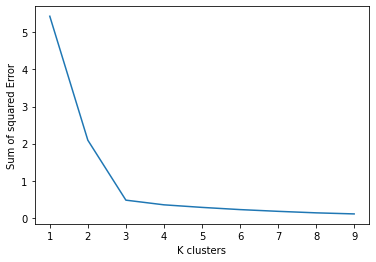

In [17]:
# Plot the graph of Sum of Squared Errors Vs K_clusters
plt.xlabel('K clusters')
plt.ylabel('Sum of squared Error')
plt.plot(k_range, sum_of_squared_error)
plt.show()

### Conclusion
- As we can see the from the plot the elbow seen for K = 3 is the optimal value of clusters.